### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the datasets

In [2]:
df_housing = pd.read_csv('housing.csv')
df_housing.shape

(20640, 10)

In [3]:
type(df_housing)

pandas.core.frame.DataFrame

In [4]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
df_housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


#### Fixing missing values, taking mean of 'total_bedrooms'

In [8]:
df_housing['total_bedrooms'].fillna(435,inplace=True)

In [9]:
df_housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### Encoding categorical columns

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
df_housing['ocean_proximity'] = le.fit_transform(df_housing['ocean_proximity'])

In [13]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


### Extracting X and y features

X values

In [14]:
X = df_housing.iloc[:,:9].values
X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  3.0000e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.0000e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.0000e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  1.0000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  1.0000e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  1.0000e+00]])

y values

In [15]:
y = df_housing.iloc[:,-1].values
y = y.reshape(len(y),1)
y

array([[452600],
       [358500],
       [352100],
       ...,
       [ 92300],
       [ 84700],
       [ 89400]], dtype=int64)

### Splitting the dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [18]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (16512, 9)
X_test:  (4128, 9)
y_train:  (16512, 1)
y_test:  (4128, 1)


### Standardizing the data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linreg = LinearRegression()

In [23]:
linreg.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred_linreg = linreg.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
r2_score(y_pred=y_pred_linreg, y_true = y_test)

0.6447964741905086

In [27]:
mean_squared_error(y_pred=y_pred_linreg, y_true = y_test)

4789410823.132916

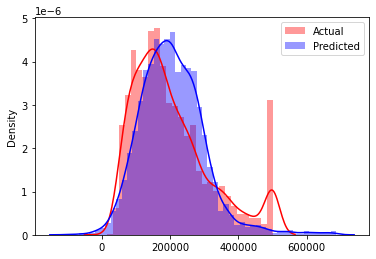

In [28]:
sns.distplot(y_test, color='red', label='Actual')
sns.distplot(y_pred_linreg, color='blue',label='Predicted')
plt.legend()
plt.show()

### Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
dtregressor = DecisionTreeRegressor()

In [31]:
dtregressor.fit(X=X_train, y=y_train)

DecisionTreeRegressor()

In [32]:
y_pred_dtr = dtregressor.predict(X_test)

In [33]:
print('Mean squared error: ',mean_squared_error(y_pred=y_pred_dtr, y_true = y_test))
print('r2 score: ',r2_score(y_pred=y_pred_dtr, y_true = y_test))

Mean squared error:  4467816213.653101
r2 score:  0.668647328374246


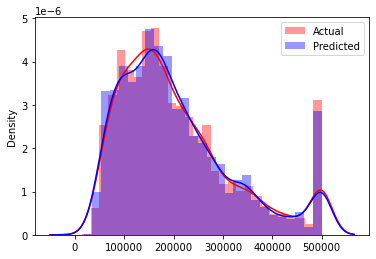

In [34]:
sns.distplot(y_test, color='red', label='Actual')
sns.distplot(y_pred_dtr, color='blue', label='Predicted')
plt.legend()
plt.show()

### Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rfrregressor = RandomForestRegressor(n_estimators = 100)

In [37]:
rfrregressor.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
y_pred_rfr = rfrregressor.predict(X_test)

In [39]:
print('Mean squared error: ',mean_squared_error(y_pred=y_pred_rfr, y_true = y_test))
print('r2 score: ',r2_score(y_pred=y_pred_rfr, y_true = y_test))

Mean squared error:  2347473573.173897
r2 score:  0.8259011555432749


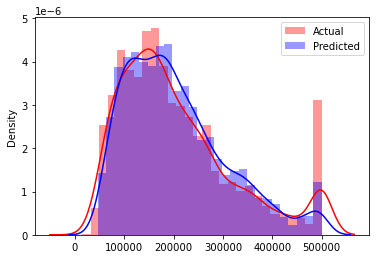

In [40]:
sns.distplot(y_test, color='red',label='Actual')
sns.distplot(y_pred_rfr, color='blue',label='Predicted')
plt.legend()
plt.show()

### Performing Linear Regression with just one variable, i.e medium_income

In [41]:
X = df_housing['median_income'].values
X = X.reshape(len(X),1)
X

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [42]:
y

array([[452600],
       [358500],
       [352100],
       ...,
       [ 92300],
       [ 84700],
       [ 89400]], dtype=int64)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [44]:
scaler.fit_transform(X_train, y_train)

array([[ 0.82768492],
       [ 2.87190381],
       [ 1.26749612],
       ...,
       [-0.10497185],
       [ 0.40851866],
       [-0.52345345]])

In [45]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (16512, 1)
X_test:  (4128, 1)
y_train:  (16512, 1)
y_test:  (4128, 1)


In [46]:
linreg.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred_onevarlr = linreg.predict(X_test)

In [48]:
print('Mean squared error: ',mean_squared_error(y_pred=y_pred_onevarlr, y_true = y_test))
print('r2 score: ',r2_score(y_pred=y_pred_onevarlr, y_true = y_test))

Mean squared error:  7017515880.464929
r2 score:  0.47242677142474976


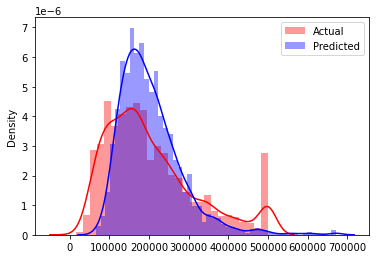

In [51]:
sns.distplot(y_test, color='red', label='Actual')
sns.distplot(y_pred_onevarlr, color='blue',label='Predicted')
plt.legend()
plt.show()